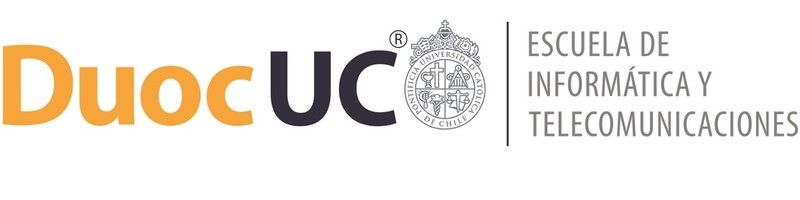

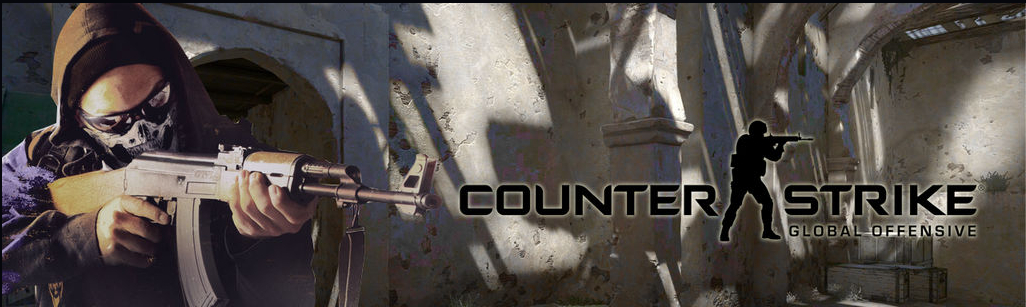

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Jose Delgado
Tomas Martinez
Dante Beche



Docente:Carlos Correa    

Sección: MLY0100-002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios
# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

# **CONTEXTO DEL NEGOCIO**
el negocio en este caso se centra en aprovechar el análisis de datos para optimizar diferentes aspectos del juego CS: GO, lo que puede llevar a una mejor experiencia para los jugadores, una comunidad más comprometida y posiblemente un aumento en los ingresos para Valve.

In [1]:
# importaciones de librerias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns



In [2]:
 # Leer el archivo Anexo ET_demo_round_traces.csv
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces.csv to Anexo ET_demo_round_traces.csv


<ipython-input-2-629ed411aee9>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
##obtener las primeras  5 filas
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
#identifica que es un dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:

df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


##hipotesis

In [ ]:
#el mapa influye en el tipo de resultado que va a ver en la partida

<Axes: >

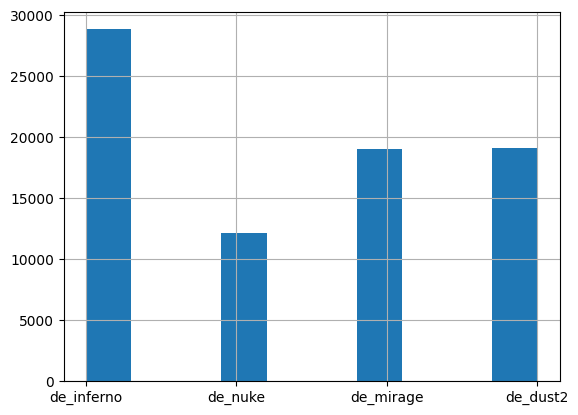

In [ ]:
df['Map'].hist()

In [ ]:
#tirar un dato alzar
df.sample()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
58225,88717,de_nuke,Terrorist,2,365,25,True,True,False,False,...,0,0,0,0,4700,23600,24,8,4,14


In [3]:
#crear un nuevo dataframe eliminando la columna 'unnamed: 0'


df2=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#Describe la columnas
df2.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
df2.describe()
#El std muestra la desviación estándar y las filas 25%, 50% y 75% muestran los percentiles correspondientes.

,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
df2.head()

,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,...,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Map_de_dust2,Map_de_inferno,Map_de_mirage,Map_de_nuke
0,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,...,750,4400,0,0,0,0,False,True,False,False
1,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,...,800,4400,0,0,0,0,False,True,False,False
2,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,...,1000,4400,0,0,0,0,False,True,False,False
3,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,...,850,4400,0,0,0,0,False,True,False,False
4,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,...,1000,4400,0,0,0,0,False,True,False,False


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79155 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79156 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

In [ ]:
#ocupamos isnull para trabajar con los booleanos
df2.isnull()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#ocupamos sum() para el registro de nulos por columna
df2.isnull().sum()

Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

In [ ]:
#ocupamos loc[] para ver una fila especifica
datos = df2.loc[84]
print(datos)

InternalTeamId                    1.000000
MatchId                           4.000000
RoundId                           9.000000
RoundWinner                       1.000000
MatchWinner                       1.000000
Survived                          0.000000
AbnormalMatch                     0.000000
TimeAlive                         0.000000
TravelledDistance                 0.006901
RLethalGrenadesThrown             0.000000
RNonLethalGrenadesThrown          0.000000
PrimaryAssaultRifle               0.000000
PrimarySniperRifle                0.000000
PrimaryHeavy                      0.000000
PrimarySMG                        0.000000
PrimaryPistol                     1.000000
FirstKillTime                     0.000000
RoundKills                        0.000000
RoundAssists                      0.000000
RoundHeadshots                    0.000000
RoundFlankKills                   0.000000
RoundStartingEquipmentValue     200.000000
TeamStartingEquipmentValue     1800.000000
MatchKills 

In [ ]:
#aca vemos  los datos nulos que hay en Team
team = df2['Team']
valor_nulo = team.isnull()
datos = team[valor_nulo]
print(datos)

13    NaN
27    NaN
Name: Team, dtype: object


In [ ]:
# Aca vemos los datos nulos en MatchWinner
Matchwinner = df2['MatchWinner']
valor_nulo = Matchwinner.isnull()
datos = Matchwinner[valor_nulo]
print(datos)

29    NaN
Name: MatchWinner, dtype: object


In [ ]:
#ocupamos isnull para ver el registro por fila
df2.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
79152    0
79153    0
79154    0
79155    0
79156    0
Length: 79157, dtype: int64

In [ ]:
#Obtener el numero total de nulos
df2.isnull().sum().sum()

3

In [ ]:
#obtener filas que tienen valores nulos
df2.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
79152    False
79153    False
79154    False
79155    False
79156    False
Length: 79157, dtype: bool

In [ ]:
#Trabajar para contar los datos nulos
df2.isnull().any(axis=1).sum()

0

In [ ]:
#Ocupamos fillna() para remplazar cualquier dato nulo
df2.fillna(0,inplace=True)

In [ ]:
#Ocupamos dropna para eliminar cualquier fila con un dato nulo
df2.dropna(inplace=True)

## Fase 3: Data Preparation

In [4]:
#ACA ocupamos OneHotEncoder  para convertir los datos categoricos a datos nominales
from sklearn.preprocessing import OneHotEncoder

df3= pd.DataFrame(['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke'])


encoder = OneHotEncoder(sparse_output=False)
encoded_df3 = encoder.fit_transform(df3)

print(encoded_df3)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
#Aca ocupamos LabelEncoder para convertir los datos nominales en datos numericos

from sklearn.preprocessing import LabelEncoder
df3 = pd.DataFrame({'Map': ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke']})


lab = LabelEncoder()

df3['Map'] = lab.fit_transform(df3['Map'])
df2 = pd.concat([df2, df3['Map']], axis=1)
print(df3)

   Map
0    0
1    1
2    2
3    3


In [6]:
#Ahora con Team hacemos lo mismo convertimos datos categoricos en datos nominales
df4 = pd.DataFrame(['CounterTerrorist','Terrorist'], columns=['Team'])


encoder = OneHotEncoder(sparse_output=False)
encoded_df4 = encoder.fit_transform(df4)




print(encoded_df4)

[[1. 0.]
 [0. 1.]]


In [7]:
#Ahora convertiremos los datos nominales en numericos
df4 = pd.DataFrame({'Team': ['CounterTerrorist', 'Terrorist']})


lab = LabelEncoder()

df4['Team'] = lab.fit_transform(df4['Team'])
df2 = pd.concat([df2, df4['Team']], axis=1)
print(df4)

   Team
0     0
1     1


In [8]:
#Ahora borramos datos nulos de RoundWinner
df2['RoundWinner'] = df2['RoundWinner'].fillna(False).map({True: 1, False: 0})



In [9]:
# Aca convertimos RoundWinner en booleanos para que Verdarero y falso valgan 0 y 1
df2['RoundWinner'] = df2['RoundWinner'].astype(bool).map({True: 1, False: 0})


In [10]:
#Aca borramos datos nulos de MatchWinner
df2['MatchWinner'] = df2['MatchWinner'].fillna(False).map({True: 1, False: 0})


In [11]:
# Aca convertimos los datos verdaderos y falso de MatchWinner en booleanos dejandolos en valores numericos de 0 y 1
df2['MatchWinner'] = df2['MatchWinner'].astype(bool).map({True: 1, False: 0})

In [12]:
# Aca borramos datos nulos de survived
df2['Survived'] = df2['Survived'].fillna(False).map({True: 1, False: 0})


In [13]:
# Aca  convertimos Survived en boolenanos para que los datos que son verdaderos y falsos pasan a 0 y 1
df2['Survived'] = df2['Survived'].astype(bool).map({True: 1, False: 0})

In [14]:
#Aca borramos datos nulos de AbnormalMatch
df2['AbnormalMatch'] = df2['AbnormalMatch'].fillna(False).map({True: 1, False: 0})

In [15]:
#Aca convertimos AbnormalMatch en boolenanos para que los datos que son verdaderos y falsos pasan a 0 y 1
df2['AbnormalMatch'] = df2['AbnormalMatch'].astype(bool).map({True: 1, False: 0})

In [16]:
#En este codigo hacemos escalamiento con maxabsScaler en numeros decimales de la fila TravelledDistance
from sklearn.preprocessing import MaxAbsScaler

df2['TravelledDistance'] = pd.to_numeric(df2['TravelledDistance'].str.replace('.', ''), errors='coerce')

df2 = df2.dropna(subset=['TravelledDistance'])

df2.loc[:, 'TravelledDistance'] = df2['TravelledDistance'].astype(float)

df2.loc[:, 'TravelledDistance'] = df2['TravelledDistance'].apply(int)

scaler = MaxAbsScaler()

df2.loc[:, 'TravelledDistance'] = scaler.fit_transform(df2[['TravelledDistance']])



In [17]:
#en este codigo estamos haciendo escalamiento con maxabscaler en numeros decimales de la fila TimeAlive
df2['TimeAlive'] = pd.to_numeric(df2['TimeAlive'].str.replace('.', ''), errors='coerce')

df2 = df2.dropna(subset=['TimeAlive'])

df2.loc[:, 'TimeAlive'] = df2['TimeAlive'].astype(float)

df2.loc[:, 'TimeAlive'] = df2['TimeAlive'].apply(int)

scaler = MaxAbsScaler()

df2.loc[:, 'TimeAlive'] = scaler.fit_transform(df2[['TimeAlive']])





In [18]:
#En este codigo hacemos escalamiento de datos con maxabscaler en numeros decimales de la fila FirstKillTime
df2['FirstKillTime'] = pd.to_numeric(df2['FirstKillTime'].str.replace('.', ''), errors='coerce')

df2 = df2.dropna(subset=['FirstKillTime'])

df2.loc[:, 'FirstKillTime'] = df2['FirstKillTime'].astype(float)

df2.loc[:, 'FirstKillTime'] = df2['FirstKillTime'].apply(int)

scaler = MaxAbsScaler()

df2.loc[:, 'FirstKillTime'] = scaler.fit_transform(df2[['FirstKillTime']])





In [19]:
#Unimos los datos que contiene labelencoded y one hot encoding
df2['Map'] = df3['Map']

In [20]:
df2['Team'] = df4['Team']

##Crear variables

In [21]:
#esta variable nueva significa cuantos minutos hubo granadas letales
df2['LethalGrenadesThrownPerMinute'] = df2['RLethalGrenadesThrown'] / (df2['TimeAlive'] / 60)


In [22]:
#esta variable nueva significa cuantos minutos hubo granadas no letales
df2['NonLethalGrenadesThrownPerMinute'] = df2['RNonLethalGrenadesThrown'] / (df2['TimeAlive'] / 60)

In [23]:
#esta variable nueva significa el uso de la pistola en la partida
df2['PistolUsage'] = np.where(df2['RoundStartingEquipmentValue'] != 0, df2['PrimaryPistol'] / df2['RoundStartingEquipmentValue'], 0)


In [24]:
#esta variable nueva es la distancia por minuto
df2['DistancePerMinute'] = df2['TravelledDistance'] / (df2['TimeAlive'] / 60)


In [25]:
#Creamos otra varible que es el valor  del equipo usuando armas en la partidas
df2['TotalWeaponUsage'] = np.where(df2['RoundStartingEquipmentValue'] != 0, (df2['PrimaryAssaultRifle'] + df2['PrimarySniperRifle'] + df2['PrimaryHeavy'] + df2['PrimarySMG'] + df2['PrimaryPistol']) / df2['RoundStartingEquipmentValue'], 0)


In [26]:
#Ocupamos la media para rellenar valores faltantes
df2['LethalGrenadesThrownPerMinute'].fillna(df2['LethalGrenadesThrownPerMinute'].mean(), inplace=True)
df2['NonLethalGrenadesThrownPerMinute'].fillna(df2['NonLethalGrenadesThrownPerMinute'].mean(), inplace=True)
df2['DistancePerMinute'].fillna(df2['DistancePerMinute'].mean(), inplace=True)
df2['PistolUsage'].fillna(df2['PistolUsage'].mean(), inplace=True)

###Estadística descriptiva

In [ ]:
#Moda:Valor que se repite mas veces
df2.mode()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,MatchFlankKills,MatchAssists,MatchHeadshots,Map,Team,LethalGrenadesThrownPerMinute,NonLethalGrenadesThrownPerMinute,PistolUsage,DistancePerMinute,TotalWeaponUsage
0,0.0,0.0,1.0,29.0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000213
1,1.0,NaN,2.0,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Media :es el valor promedio de un conjunto de datos
df2.mean()

Map                                 1.500000e+00
Team                                0.000000e+00
InternalTeamId                      1.500000e+00
MatchId                             2.505278e+02
RoundId                             1.276531e+01
RoundWinner                         7.069710e-01
MatchWinner                         4.691874e-01
Survived                            4.035323e-01
AbnormalMatch                       0.000000e+00
TimeAlive                           1.896387e-01
TravelledDistance                   1.811466e-01
RLethalGrenadesThrown               4.986735e-01
RNonLethalGrenadesThrown            1.258073e+00
PrimaryAssaultRifle                 6.753590e-01
PrimarySniperRifle                  8.984129e-02
PrimaryHeavy                        5.963652e-03
PrimarySMG                          7.046185e-03
PrimaryPistol                       2.217899e-01
FirstKillTime                       1.118176e-01
RoundKills                          6.713578e-01
RoundAssists        

In [ ]:
#Mediana:la posicion central de un conjunto de datos
df2.median()

Map                                 1.500000e+00
Team                                0.000000e+00
InternalTeamId                      2.000000e+00
MatchId                             2.360000e+02
RoundId                             1.200000e+01
RoundWinner                         1.000000e+00
MatchWinner                         0.000000e+00
Survived                            0.000000e+00
AbnormalMatch                       0.000000e+00
TimeAlive                           7.659978e+15
TravelledDistance                   8.771029e+15
RLethalGrenadesThrown               0.000000e+00
RNonLethalGrenadesThrown            1.000000e+00
PrimaryAssaultRifle                 1.000000e+00
PrimarySniperRifle                  0.000000e+00
PrimaryHeavy                        0.000000e+00
PrimarySMG                          0.000000e+00
PrimaryPistol                       0.000000e+00
FirstKillTime                       2.162491e+08
RoundKills                          0.000000e+00
RoundAssists        

In [ ]:
#Varianza:la medida de dispersion que indica cuanto se alejan los datos de su  media
df2.var()

InternalTeamId                 2.500032e-01
MatchId                        2.236754e+04
RoundId                        5.524707e+01
RoundWinner                    2.071641e-01
MatchWinner                    2.490534e-01
Survived                       2.406985e-01
AbnormalMatch                  0.000000e+00
TimeAlive                      8.583141e-04
TravelledDistance              1.841130e-05
RLethalGrenadesThrown          3.575864e-01
RNonLethalGrenadesThrown       1.404008e+00
PrimaryAssaultRifle            2.154121e-01
PrimarySniperRifle             7.828613e-02
PrimaryHeavy                   5.699764e-03
PrimarySMG                     6.798427e-03
PrimaryPistol                  1.725998e-01
FirstKillTime                  1.269076e-02
RoundKills                     7.775678e-01
RoundAssists                   1.486884e-01
RoundHeadshots                 3.350591e-01
RoundFlankKills                1.028104e-01
RoundStartingEquipmentValue    4.457526e+06
TeamStartingEquipmentValue     9

In [ ]:
#Desviacion estandar:una medida estadistica que se evalua para medir la dispersion de un conjunto de datos
df2.std()

Map                                 1.290994e+00
Team                                0.000000e+00
InternalTeamId                      5.000032e-01
MatchId                             1.495567e+02
RoundId                             7.432660e+00
RoundWinner                         4.551545e-01
MatchWinner                         4.990528e-01
Survived                            4.906088e-01
AbnormalMatch                       0.000000e+00
TimeAlive                           2.242912e-01
TravelledDistance                   1.929264e-01
RLethalGrenadesThrown               5.979864e-01
RNonLethalGrenadesThrown            1.184908e+00
PrimaryAssaultRifle                 4.641266e-01
PrimarySniperRifle                  2.797982e-01
PrimaryHeavy                        7.549725e-02
PrimarySMG                          8.245309e-02
PrimaryPistol                       4.154531e-01
FirstKillTime                       2.402537e-01
RoundKills                          8.818004e-01
RoundAssists        

### Kpi

In [ ]:
#Aca vemos la partidas perdidas
partidas_perdidas = df2[df2['MatchWinner'] == 0].shape[0]
print(partidas_perdidas)

42017


In [ ]:
#Aca hay el total de partidas ganadas
partidas_ganadas = df2['MatchWinner'].sum()
print(partidas_ganadas)

37139


In [ ]:
# aca vemos la cantidad de jugadores
cantidad_jugadores = len(df2)
print(cantidad_jugadores)

79157


In [ ]:
#Aca vemos el promedio de tiempo de partida
Promedio_de_tiempo_de_partida=df2['TimeAlive'].mean()
print(Promedio_de_tiempo_de_partida)

0.18963865939163047


In [ ]:
#Cantidad de rondas
cantidad_rondas = df2['RoundId'].nunique()
print(cantidad_rondas)

36


In [ ]:
#Cantidad de Partidas
cantidad_partidas = df2['MatchId'].nunique()
print(cantidad_partidas)


333


In [ ]:
#Cantidad de equipos
cantidad_equipos = df2['InternalTeamId'].nunique()
print(cantidad_equipos)


2


In [ ]:
#Matriz de pearson
Matriz_de_Pearson=df2.corr(method='pearson')
print(Matriz_de_Pearson)

                                       Map  Team  InternalTeamId   MatchId  \
Map                               1.000000   NaN             NaN       NaN   
Team                                   NaN   NaN             NaN       NaN   
InternalTeamId                         NaN   NaN        1.000000  0.000046   
MatchId                                NaN   NaN        0.000046  1.000000   
RoundId                                NaN   NaN       -0.000036  0.001517   
RoundWinner                            NaN   NaN       -0.051765 -0.452422   
MatchWinner                            NaN   NaN       -0.079463 -0.013439   
Survived                               NaN   NaN        0.044857 -0.003216   
AbnormalMatch                          NaN   NaN             NaN       NaN   
TimeAlive                        -0.769848   NaN       -0.004018  0.007080   
TravelledDistance                -0.286583   NaN       -0.000803  0.022467   
RLethalGrenadesThrown                  NaN   NaN        0.039147

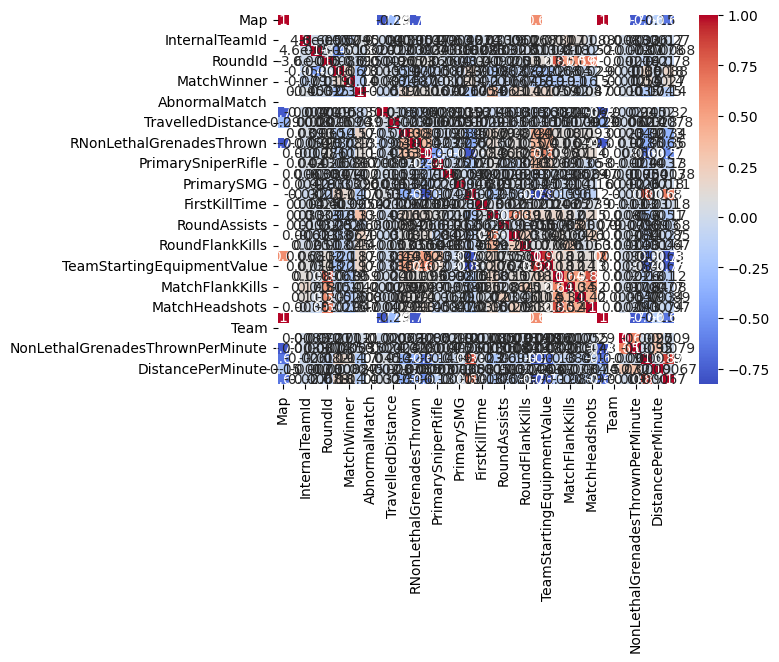

In [ ]:
#Aca Tiramos un mapa de calor


corr = df2.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')


plt.show()



## Fase 4: Modeling

### Regresión

In [27]:
#Aca hacemos la division del dataset
from sklearn.model_selection import train_test_split
X = df2[['PrimaryHeavy', 'MatchKills', 'TravelledDistance', 'Survived', 'MatchHeadshots']]
y = df2['PistolUsage']

X_train, X_test, y_train, y_test = train_test_split(X.dropna(), y.dropna(), test_size=0.3, random_state=42)

In [28]:
#Aca mostramos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


modelo_LR = LinearRegression()
modelo_LR.fit(X_train, y_train)
y_pred_LR = modelo_LR.predict(X_test)
y_pred_LR_train = modelo_LR.predict(X_train)

r2_LR = r2_score(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)
rmse_LR = np.sqrt(mse_LR)

r2_LR1 = r2_score(y_train, y_pred_LR_train)
mae_LR1 = mean_absolute_error(y_train,y_pred_LR_train )
mse_LR1 = mean_squared_error(y_train,y_pred_LR_train )
rmse_LR1 = np.sqrt(mse_LR)

n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_lr_relevantes = 1 - ((1 - r2_LR) * (n - 1) / (n - p - 1))
print('Test')
print('R^2 ajustado:', r2_adj_lr_relevantes)
print('MAE:', mae_LR)
print('MSE:', mse_LR)
print('RMSE:', rmse_LR)
n = X_train.shape[0]
p = X_train.shape[1]
r2_adj_lr_relevantes1 = 1 - ((1 - r2_LR) * (n - 1) / (n - p - 1))
print('Train')
print('R^2 ajustado:', r2_adj_lr_relevantes1)
print('MAE:', mae_LR1)
print('MSE:', mse_LR1)
print('RMSE:', rmse_LR1)


Test
R^2 ajustado: 0.04202497507160041
MAE: 0.000891149574482062
MSE: 1.839817535732698e-06
RMSE: 0.0013563987377363258
Train
R^2 ajustado: 0.04214025104296426
MAE: 0.0008868362390975783
MSE: 1.8199830704037342e-06
RMSE: 0.0013563987377363258


In [29]:
#Aca se muestra el modelo de ramdomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


modelo_rf = RandomForestRegressor(n_estimators=100,random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)
y_pred_rf1=modelo_rf.predict(X_train)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf_train = r2_score(y_train, y_pred_rf1)
mae_rf_train = mean_absolute_error(y_train, y_pred_rf1)
mse_rf_train = mean_squared_error(y_train, y_pred_rf1)
rmse_rf_train = np.sqrt(mse_rf_train)

n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))
print('Test:')
print('R^2 ajustado :', r2_adj_rf)
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print('Train:')

n = X_train.shape[0]
p = X_train.shape[1]
r2_adj_rf_train = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))
print('R^2 ajustado :', r2_adj_rf_train)
print('MAE:', mae_rf_train)
print('MSE:', mse_rf_train)
print('RMSE:', rmse_rf_train)

Test:
R^2 ajustado : -0.13138354357141124
MAE: 0.000904342310570009
MSE: 2.172853392767372e-06
RMSE: 0.0014740601727091646
Train:
R^2 ajustado : -0.13124740083952724
MAE: 0.0003342621333729117
MSE: 3.046876076636795e-07
RMSE: 0.0005519851516695712


In [30]:
#Aca mostramos un modelo  de arbol de decision con regresion

from sklearn.tree import DecisionTreeRegressor


modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(X_train, y_train)

y_pred_dt = modelo_dt.predict(X_test)
y_pred_dt_train = modelo_dt.predict(X_train)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_dt = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))

r2_dt1 = r2_score(y_train,y_pred_dt_train )
mae_dt1 = mean_absolute_error(y_train, y_pred_dt_train)
mse_dt1 = mean_squared_error(y_train, y_pred_dt_train)
rmse_dt1 = np.sqrt(mse_dt)

print('test:')
print('R^2 ajustado del modelo de árbol de decisión:', r2_adj_dt)
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)
n = X_train.shape[0]
p = X_train.shape[1]
r2_adj_dt_train = 1 - ((1 - r2_dt) * (n - 1) / (n - p - 1))
print('Train:')
print('R^2 ajustado del modelo de árbol de decisión:', r2_adj_dt_train)
print('MAE:', mae_dt1)
print('MSE:', mse_dt1)
print('RMSE:', rmse_dt1)

test:
R^2 ajustado del modelo de árbol de decisión: -0.844654175882366
MAE: 0.0009637638231439894
MSE: 3.5427093732475793e-06
RMSE: 0.0018822086423262378
Train:
R^2 ajustado del modelo de árbol de decisión: -0.8444322031832641
MAE: 3.23510309110698e-06
MSE: 7.136065889279169e-09
RMSE: 0.0018822086423262378


In [ ]:
#Aca se muestra un arbol de decision
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_dt)

##Podado de arbol

In [ ]:
#Aca empezamos con el podado del arbol
from sklearn.model_selection import cross_val_score

max_depths = range(1, 10)





In [ ]:
#Creamos una lista para almacenar los datos de la validacion cruzada
scores = []

In [ ]:
# Probamos la profundidad de arbol de decision y calculamos la validacion cruzada
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    score = cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores.append(np.mean(score))

In [ ]:
#Selecionamos el valor de la profundiad maxima para maximizar el puntaje de validacion cruzada
optimal_max_depth = max_depths[np.argmax(scores)]

In [ ]:
#Entrenamos el modelo con el valor de profundidad maxima
tree_pruned = DecisionTreeRegressor(max_depth=optimal_max_depth, random_state=42)
tree_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
feature_names = df2.columns.tolist()


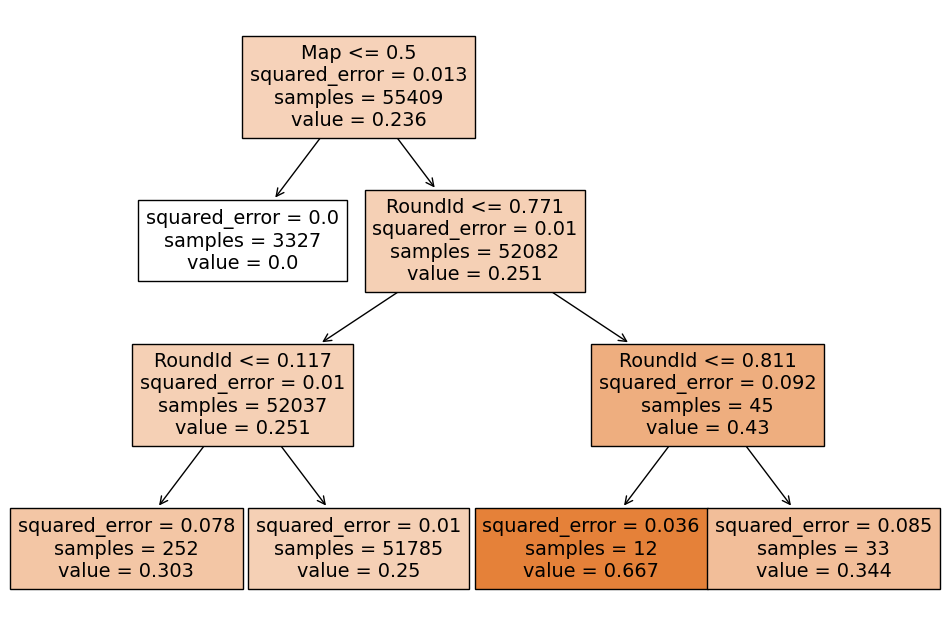

In [ ]:
#Aca se muestra el arbol  podado
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8))
plot_tree(tree_pruned, filled=True, feature_names=feature_names)
plt.show()

##Mejorando modelos y sus metricas


In [31]:
#Mejoramo la metricas de regresion lineal
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()

ensemble = VotingRegressor(estimators=[('lr', lr)])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
y_pred_Train = ensemble.predict(X_train)

r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_lr = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

r2_Train= r2_score(y_train, y_pred_Train)
mae_Train = mean_absolute_error(y_train,y_pred_Train)
mse_Train = mean_squared_error(y_train, y_pred_Train)
rmse_Train = np.sqrt(mse_Train)

n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_lr_train = 1 - ((1 - r2_Train) * (n - 1) / (n - p - 1))


print('Test:')
print('R^2 ajustado:', r2_adj_lr)
print('MAE:', mae)
print('RMSE:', rmse)
print('MSE:', mse)

print('train :')
print('R^2 ajustado de train:', r2_adj_lr_train)
print('MAE:', mae_Train)
print('RMSE:', rmse_Train)
print('MSE:', mse_Train)



Test:
R^2 ajustado: 0.04202497507160041
MAE: 0.000891149574482062
RMSE: 0.0013563987377363258
MSE: 1.839817535732698e-06
train :
R^2 ajustado de train: 0.04314086044469134
MAE: 0.0008868362390975783
RMSE: 0.001349067481782781
MSE: 1.8199830704037342e-06


In [32]:
#Ahora mejoramos las metricas de randomforest


rf=RandomForestRegressor(random_state=42)

ensemble = VotingRegressor(estimators=[('rf', rf)])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
y_pred_Train = ensemble.predict(X_train)


r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred )
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_adj_Rf = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


r2_Train= r2_score(y_train, y_pred_Train)
mae_Train = mean_absolute_error(y_train,y_pred_Train)
mse_Train = mean_squared_error(y_train, y_pred_Train)
rmse_Train = np.sqrt(mse_Train)
r2_adj_Rf_Train = 1 - ((1 - r2_Train) * (n - 1) / (n - p - 1))


print('Test')
print('R^2 ajustado:', r2_adj_Rf)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)



print('train :')
print('R^2 ajustado:', r2_adj_Rf_Train)
print('MAE:', mae_Train)
print('RMSE:', rmse_Train)
print('MSE:', mse_Train)

Test
R^2 ajustado: -0.13138354357141124
MAE: 0.000904342310570009
MSE: 2.172853392767372e-06
RMSE: 0.0014740601727091646
train :
R^2 ajustado: 0.8398099812886943
MAE: 0.0003342621333729117
RMSE: 0.0005519851516695712
MSE: 3.046876076636795e-07


In [33]:
#Ahora tambien el de arbol de decision

dtr=DecisionTreeRegressor(random_state=42)

ensemble = VotingRegressor(estimators=[('dtr', dtr)])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
y_pred_Train = ensemble.predict(X_train)


r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred )
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_adj_Dtr = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


r2_Train= r2_score(y_train, y_pred_Train)
mae_Train = mean_absolute_error(y_train,y_pred_Train)
mse_Train = mean_squared_error(y_train, y_pred_Train)
rmse_Train = np.sqrt(mse_Train)
r2_adj_Dtr_Train = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Test:')
print('R^2 ajustado:', r2_adj_Dtr)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

print('train :')
print('R^2:',r2_adj_Dtr_Train )
print('MAE:', mae_Train)
print('RMSE:', rmse_Train)
print('MSE:', mse_Train)


Test:
R^2 ajustado: -0.844654175882366
MAE: 0.0009637638231439894
MSE: 3.5427093732475793e-06
RMSE: 0.0018822086423262378
train :
R^2: -0.844654175882366
MAE: 3.23510309110698e-06
RMSE: 8.447523832034551e-05
MSE: 7.136065889279169e-09


## viendo test y train





In [ ]:
from sklearn.tree import DecisionTreeRegressor

y_pred_dt= modelo_dt.predict(X_test)
y_pred_dt1=modelo_dt.predict(X_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
R2 = r2_score(y_test, y_pred_dt)
mse1=mean_squared_error(y_train, y_pred_dt1)
mae1=mean_absolute_error(y_train, y_pred_dt1)
R21=r2_score(y_train, y_pred_dt1)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)
print("MSE: ",mse1)
print("MAE: ",mae1)
print("R^2: ",R21)

MSE:  3.739566180737953e-06
MAE:  0.0010631087776850248
R^2:  -0.8035503258233518
MSE:  2.7167699861257514e-08
MAE:  1.3841498178902987e-05
R^2:  0.9868137630558279


In [ ]:

1 - sum((y_test -y_pred_dt )**2)/sum((y_test - y_test.mean())**2)

-0.8035503258234864

In [ ]:
#Vemos la columna de train
X_train.columns

Index(['MatchKills', 'MatchAssists', 'MatchFlankKills', 'RoundKills',
       'TimeAlive'],
      dtype='object')

In [ ]:
#Vemos ahora el svr
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svm_r = SVR(kernel='rbf', C=100, gamma='scale')
svm_r.fit(X_train, y_train)
Svmr = svm_r.predict(X_test)

mse = mean_squared_error(y_test, Svmr)
mae = mean_absolute_error(y_test, Svmr)
R2 = r2_score(y_test, Svmr)

print("MSE: ", mse)
print("MAE: ", mae)
print("R^2: ", R2)


MSE:  3.258980447860495
MAE:  1.294056792753148
R^2:  0.690956658183556


In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(X_train,y_train)

In [ ]:
#Vemos los mejores datos y mejores parametros de arbol de decision

print(grid.best_score_)
print(grid.best_params_)

-0.000174257593781324
{'max_depth': 4, 'min_samples_split': 2}


In [ ]:
#Vemos los datos de griv que son datos de test y train
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013516,0.003893,0.003620,0.000251,3,2,"{'max_depth': 3, 'min_samples_split': 2}",-0.000647,-0.001073,0.000265,-0.000114,0.000483,0.000146,0.000357,-0.000383,-0.000446,-0.000716,-0.000213,0.000494,7
1,0.010850,0.000350,0.003556,0.000205,3,3,"{'max_depth': 3, 'min_samples_split': 3}",-0.000647,-0.001073,0.000265,-0.000114,0.000483,0.000146,0.000357,-0.000383,-0.000446,-0.000716,-0.000213,0.000494,7
2,0.008606,0.001993,0.002832,0.001226,3,4,"{'max_depth': 3, 'min_samples_split': 4}",-0.000647,-0.001073,0.000265,-0.000114,0.000483,0.000146,0.000357,-0.000383,-0.000446,-0.000716,-0.000213,0.000494,7
3,0.006613,0.000283,0.001981,0.000325,4,2,"{'max_depth': 4, 'min_samples_split': 2}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1
4,0.006648,0.000551,0.001828,0.000107,4,3,"{'max_depth': 4, 'min_samples_split': 3}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1
5,0.006446,0.000305,0.001789,0.000164,4,4,"{'max_depth': 4, 'min_samples_split': 4}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1
6,0.006848,0.000574,0.001965,0.000295,5,2,"{'max_depth': 5, 'min_samples_split': 2}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1
7,0.006925,0.000690,0.001899,0.000159,5,3,"{'max_depth': 5, 'min_samples_split': 3}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1
8,0.006487,0.000270,0.001768,0.000070,5,4,"{'max_depth': 5, 'min_samples_split': 4}",-0.000606,-0.001076,0.000295,-0.000058,0.000588,0.000215,0.000360,-0.000339,-0.000446,-0.000676,-0.000174,0.000510,1


In [ ]:

grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [ ]:
#Vemos los mejores datos y mejores parametros de arbol de decision podado
print(grid.best_score_)
print(grid.best_params_)


-0.000174257593781324
{'max_depth': 4, 'min_samples_split': 2}


In [ ]:
#leemos los datos de grid que son datos de train y test
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                              0.006923
std_fit_time                                                0.00045
mean_score_time                                            0.001937
std_score_time                                              0.00008
param_max_depth                                                   4
param_min_samples_split                                           2
params                     {'max_depth': 4, 'min_samples_split': 2}
split0_test_score                                         -0.000606
split1_test_score                                         -0.001076
split2_test_score                                          0.000295
split3_test_score                                         -0.000058
split4_test_score                                          0.000588
split5_test_score                                          0.000215
split6_test_score                                           0.00036
split7_test_score                               

### Clasificación



In [34]:
#division del dataset
from sklearn.model_selection import train_test_split
X = df2.drop('Survived', axis=1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [35]:
# Imputamos los valores faltantes utilizando la media
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Metricas de test:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      9502
           1       0.48      0.47      0.48      6330

    accuracy                           0.58     15832
   macro avg       0.57      0.57      0.57     15832
weighted avg       0.58      0.58      0.58     15832



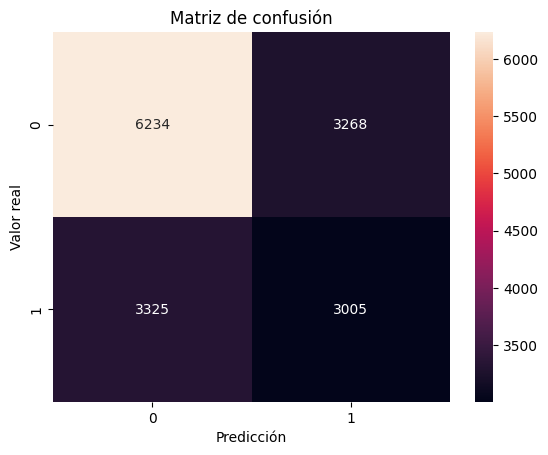

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

y_pred_test_lr = lr.predict(X_test)

print('Metricas de test:')
print(classification_report(y_test, y_pred_test_lr))



cm_test_lrc = confusion_matrix(y_test, y_pred_test_lr)

sns.heatmap(cm_test_lrc, annot=True, fmt='d')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


In [37]:
#Valor roc y auc de test de regresion logistica
roc_value = roc_auc_score(y_test,y_pred_test_lr)

In [38]:
print(roc_value)

0.5653979722569423


Metricas de train:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     37712
           1       0.49      0.48      0.48     25612

    accuracy                           0.58     63324
   macro avg       0.57      0.57      0.57     63324
weighted avg       0.58      0.58      0.58     63324



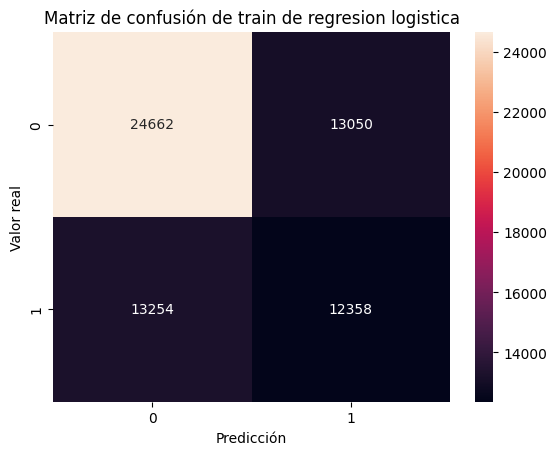

In [39]:

y_pred_train_lr=lr.predict(X_train)

print('Metricas de train:')
print(classification_report(y_train, y_pred_train_lr))
cm_train_lrc = confusion_matrix(y_train, y_pred_train_lr)
sns.heatmap(cm_train_lrc, annot=True, fmt='d')
plt.title('Matriz de confusión de train de regresion logistica')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

Test:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      9502
           1       0.70      0.63      0.66      6330

    accuracy                           0.74     15832
   macro avg       0.73      0.72      0.73     15832
weighted avg       0.74      0.74      0.74     15832



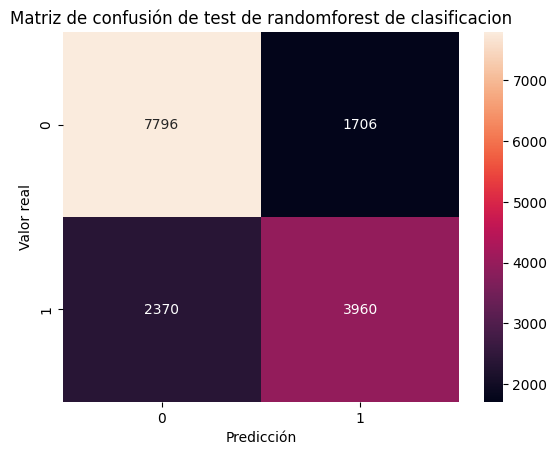

In [40]:
#Arbol de decision de clasificacion con los datos de test
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=14, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

y_pred_test_rfc = rf.predict(X_test)

print('Test:')
print(classification_report(y_test, y_pred_test_rfc))


cmr_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)

sns.heatmap(cmr_test_rfc, annot=True, fmt='d')
plt.title('Matriz de confusión de test de randomforest de clasificacion')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


In [41]:
#Valor roc y auc de test de random forest

roc_value = roc_auc_score(y_test,y_pred_test_rfc)

In [42]:
print(roc_value)

0.7230256339149354


Train:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     37712
           1       0.87      0.76      0.81     25612

    accuracy                           0.85     63324
   macro avg       0.86      0.84      0.85     63324
weighted avg       0.86      0.85      0.85     63324



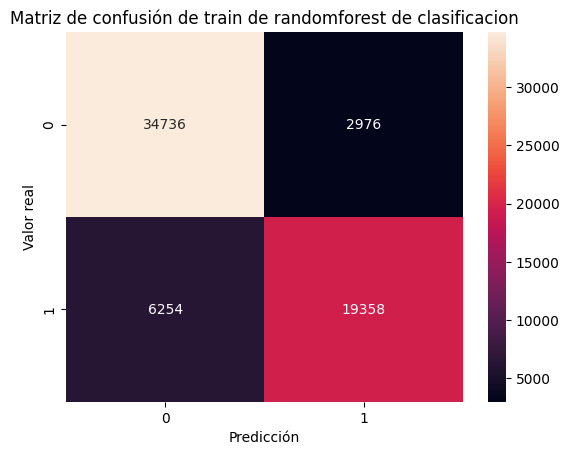

In [43]:
#random Forest de clasificacion con los datos de train

y_pred_train_rfc=rf.predict(X_train)

print('Train:')
print(classification_report(y_train,y_pred_train_rfc))

cm_train_rfc = confusion_matrix(y_train, y_pred_train_rfc)

sns.heatmap(cm_train_rfc, annot=True, fmt='d')
plt.title('Matriz de confusión de train de randomforest de clasificacion')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

Test:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      9502
           1       0.64      0.63      0.64      6330

    accuracy                           0.71     15832
   macro avg       0.70      0.70      0.70     15832
weighted avg       0.71      0.71      0.71     15832



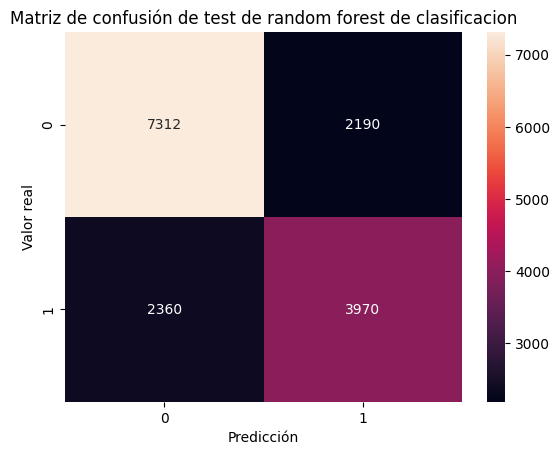

In [44]:
#Arbol de decsion con metricas de test
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=14, criterion='gini', random_state=42)
dt.fit(X_train, y_train)

y_pred_test_dtc = dt.predict(X_test)



print('Test:')
print(classification_report(y_test, y_pred_test_dtc))


cm_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)

sns.heatmap(cm_test_dtc, annot=True, fmt='d')
plt.title('Matriz de confusión de test de random forest de clasificacion')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



In [ ]:
#Valor roc y auc de test de random forest
roc_value = roc_auc_score(y_test,y_pred_test_dtc)

In [ ]:
print(roc_value)

0.6760433658821147


train
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     37712
           1       0.81      0.77      0.79     25612

    accuracy                           0.84     63324
   macro avg       0.83      0.83      0.83     63324
weighted avg       0.83      0.84      0.83     63324



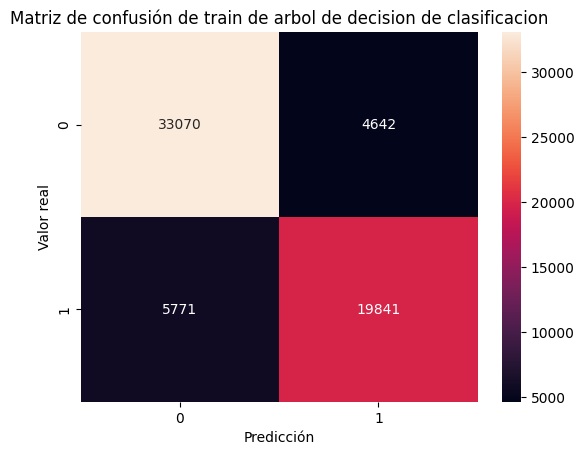

In [45]:
#arbol de decision con metricas de train
y_pred_train_dtc=dt.predict(X_train)

print('train')
print(classification_report(y_train, y_pred_train_dtc))

cm_train_dtc = confusion_matrix(y_train, y_pred_train_dtc)

sns.heatmap(cm_train_dtc, annot=True, fmt='d')
plt.title('Matriz de confusión de train de arbol de decision de clasificacion')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

##Curva Roc

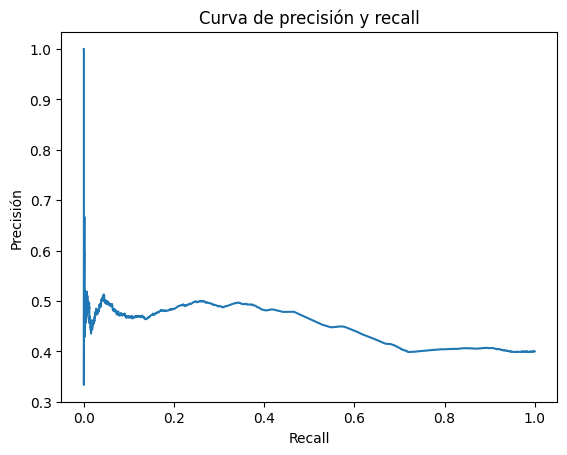

In [ ]:
#Aca se muestra la curva del modelo de regresion logistica entre precision y recall
from sklearn.metrics import precision_recall_curve

y_pred_proba = lr.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)


plt.plot(recall, precision)
plt.title('Curva de precisión y recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.show()

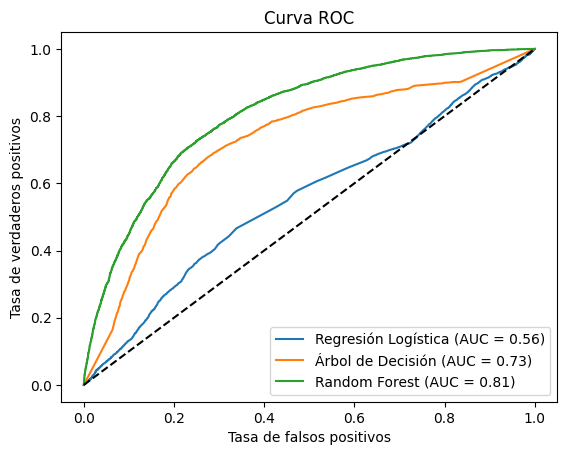

In [ ]:
#Creamos una curva roc para ver cual modelo es mejor
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr_lr, tpr_lr, label='Regresión Logística (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_dt, tpr_dt, label='Árbol de Decisión (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc='lower right')
plt.show()


Aca se muestra la curva roc que  compara tres modelos diferentes los cuales son la regresion logistica, arbol de decision y random forest  

##Ajuste de modelos

In [46]:
#Aca mejoramos metricas de modelos de clasificacion en este caso es de randomforest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer(strategy='mean')

# Crear un clasificador Random Forest
clf = RandomForestClassifier()

# Crear un pipeline que primero impute los valores faltantes y luego aplique el clasificador
pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', clf)])




In [ ]:
# Realizar la validación cruzada con 5 folds
scores = cross_val_score(pipeline, X, y, cv=5)

In [ ]:
# Imprimimos los scores de la validación cruzada
print("Scores de la validación cruzada:", scores)

print("Score promedio de la validación cruzada:", scores.mean())

Scores de la validación cruzada: [0.63308489 0.70601983 0.75030004 0.75086855 0.75080538]
Score promedio de la validación cruzada: 0.7182157401946642


In [ ]:
#ocupamos cross validation para mejorar metricas de los modelos de clasificacion en este caso es de arbol de decision
from sklearn.model_selection import cross_val_score


imputer = SimpleImputer(strategy='mean')

clf = DecisionTreeClassifier()



pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', clf)])

In [ ]:
#Realizamos validacion cruzada con 5 folds

scores = cross_val_score(pipeline, X, y, cv=5)



In [ ]:
#imprimimos valores de score para ver si el modelo mejoro

print("Scores de la validación cruzada:", scores)

# Imprimir el score promedio de la validación cruzada
print("Score promedio de la validación cruzada:", scores.mean())


Scores de la validación cruzada: [0.47599798 0.49583123 0.57273703 0.60754216 0.5173394 ]
Score promedio de la validación cruzada: 0.5338895606189543


In [ ]:
#Aca mejoramos metricas de modelos de clasificacion en este caso es de randomforest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', lr )])

In [ ]:
# Realizar la validación cruzada con 5 folds
scores = cross_val_score(pipeline, X, y, cv=5)

In [ ]:
# Imprimimos los scores de la validación cruzada
print("Scores de la validación cruzada:", scores)

print("Score promedio de la validación cruzada:", scores.mean())

Scores de la validación cruzada: [0.58918646 0.59320321 0.4512665  0.58979218 0.60545765]
Score promedio de la validación cruzada: 0.5657811990846086


## Fase 5: Deployment

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pickle

# Crear datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# Crear y entrenar el modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X, y)

# Guardar el modelo
with open('modelo.pkl', 'wb') as file:
    pickle.dump(modelo, file)

print("Modelo guardado como 'modelo.pkl'")

Modelo guardado como 'modelo.pkl'


In [51]:
!ls

'Anexo ET_demo_round_traces.csv'   modelo.pkl   sample_data


In [52]:
import os

print("Directorio actual:", os.getcwd())
print("Contenido del directorio:")
print(os.listdir())

Directorio actual: /content
Contenido del directorio:
['.config', 'Anexo ET_demo_round_traces.csv', 'modelo.pkl', 'sample_data']


In [53]:
import pickle
from flask import Flask, request, jsonify
import numpy as np
from google.colab import output

# Cargar el modelo (asegúrate de que el archivo exista en tu entorno de Colab)
with open('modelo.pkl', 'rb') as modelo_file:
    modelo = pickle.load(modelo_file)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    to_predict_list = data['features']
    to_predict_list = list(map(float, to_predict_list))

    # Hacer la predicción
    result = modelo.predict([to_predict_list])[0]

    # Mapear el resultado a una categoría
    categories = ['PrimaryHeavy', 'MatchKills', 'TravelledDistance', 'Survived', 'MatchHeadshots']
    prediction = categories[int(result)] if int(result) < len(categories) else 'Unknown'

    return jsonify({'prediction': prediction})




https://xlhy0d80mm-496ff2e9c6d22116-5000-colab.googleusercontent.com/
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
